# Capstone Analytic
## Suicide Rates Examined

Being examined is data from the World Health Organization on reported suicides. The data is reported by country (142 total), year (1979-2016), gender, age group, total number of suicides and total number of living persons. There are 43777 rows of data in the dataset that can be examined. It is important to note that China, India and Indonesia, the first, second and fourth most populous countries, are not included in this data set. Conclusions can't be drawn about the suicide rates due to high or low populations due to this missing data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\suicideData1.csv")


## General Examination of the Data

In [3]:
df = df.dropna()
print(df.describe())
print("Suicides Numbers Variance: ", df['suicides_no'].var())

               year   suicides_no    population
count  36060.000000  36060.000000  3.606000e+04
mean    1998.935441    221.809956  1.699996e+06
std       10.163883    855.449442  3.697811e+06
min     1979.000000      0.000000  2.590000e+02
25%     1991.000000      2.000000  8.056600e+04
50%     2000.000000     21.000000  3.757650e+05
75%     2008.000000    116.000000  1.344900e+06
max     2016.000000  22338.000000  4.380521e+07
Suicides Numbers Variance:  731793.7484851474


With this simple overview of the data we can see that the mean number of suicides is 193 with 0 being the lowest report and 22338 being the highest report. We must keep in mind that this data is further broken down by age and sex so it doesn't give an overall view of what the mean and maximum value are if we were just considering the amount by year.
The maximum value that we are seeing is interestingly high considering that the mean in 193 and the maximum is 22338. The standard deviation and variance are also very high at 801 and 640944. It would be useful to look at the outliers for this dataset.

In [ ]:
df.boxplot('suicides_no')

Since there are so many outliers in such a large range (below 1000 to above 20000) it is useful to include the boxplot with the outliers removed. This will let us visually understand the large distribution of the outliers as well as the distribution of the quartiles.

In [ ]:
plt.subplot(1, 2, 1)
plt.title('With Outliers')
df.boxplot('suicides_no')
plt.subplot(1, 2, 2)
plt.title('Without Outliers')
df.boxplot('suicides_no', showfliers = False, showmeans = True)

We can see that the outliers are so great that the mean (the green arrow) is quite far outside of the interquartile range. What will the data look like if instead of looking at just the overall suicide numbers, we looked at the suicides per capita (suicide_no/population)?

               year   suicides_no    population     perCapita
count  36060.000000  36060.000000  3.606000e+04  36060.000000
mean    1998.935441    221.809956  1.699996e+06      0.000132
std       10.163883    855.449442  3.697811e+06      0.000199
min     1979.000000      0.000000  2.590000e+02      0.000000
25%     1991.000000      2.000000  8.056600e+04      0.000008
50%     2000.000000     21.000000  3.757650e+05      0.000060
75%     2008.000000    116.000000  1.344900e+06      0.000170
max     2016.000000  22338.000000  4.380521e+07      0.003008
Suicides Numbers Variance:  731793.7484851474
Per Capita Variance:  3.961121143414038e-08


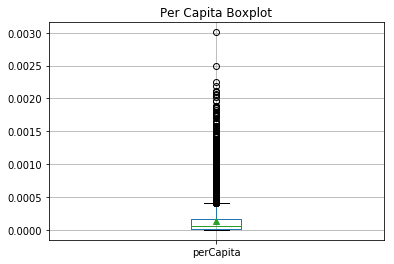

In [4]:
df['perCapita'] = df['suicides_no']/df['population']
print(df.describe())
print("Suicides Numbers Variance: ", df['suicides_no'].var())
print("Per Capita Variance: ", df['perCapita'].var())
plt.title('Per Capita Boxplot')
df.boxplot('perCapita', showmeans = True)

With this new column of Per Capita values added we can see that the maximum value of the overall suicides reported is about 115 times greater than the mean, while the maximum value of the per capita suicides is only around 2 times larger than the mean. Although there are some outliers in the boxplot for the per capita data, we can easily visualize the interquartile range which was impossible to do with the overall suicide numbers. The mean is also within the interquartile range. The variance for the per capita suicide data is also much lower than the variance for the overall suicide numbers. It would be better to look at the per capita values to account for the differences in populations throughout the dataset.

## Per Capital Data Overview

Let see if we can see if a certain group is creating the outliers.

<BarContainer object of 36060 artists>

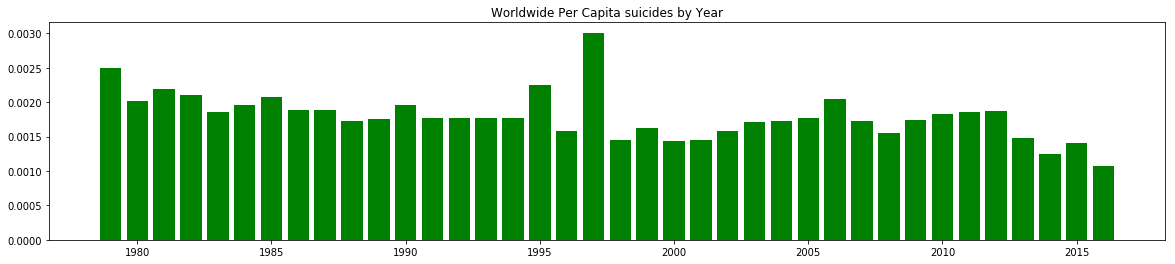

In [6]:
plt.figure(figsize = (20, 4))
plt.title('Worldwide Per Capita suicides by Year')
plt.bar(df['year'], df['perCapita'], color = "green")

We can see definite spikes at the beginning of the plot in 1979, 1995 and 1997. There is also an upward trend starting in 2000 and ending in 2006. There are also dips in 1996, 1998, 2008, 2014 and 2016. This plot is just showing the highest per capita values for that given year without differentiating between country, age or gender. It would be useful to look into the sums per year for all categories together.

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title("Worldwide Per Capita Suicides by Age")
plt.plot(df['age'], df['perCapita'], color = "red")
plt.subplot(1,2,2)
plt.title("Worldwide Per Capita Suicides by Gender")
plt.plot(df['sex'], df['perCapita'], color = "orange")

The age group 75+ has nearly double per capita suicide rates compared to the next highest group, the 25-34 year age group. Males have a more than double per capita suicide rate compared to females. These values would also be better understood if we considered them independent of spikes caused by the other data. 

In [ ]:
plt.figure(figsize = (15,6))
plt.xticks(fontsize = 6, rotation = 90)
plt.title("Worldwide Per Capita Suicides by Country")
plt.plot( df['country'],df['perCapita'], color = "purple")
print(list(df))

There are spikes in Aruba, French Guiana, Hungary, Republic of Korea, San Marino, Seychelles and Suriname. This data shows all of the fluctuation between age, gender and year on top of each other, so it might be better to add all of the suicides for each country and average them over the 38 year period. That way we can see which countries truly have a higher rate of suicides per capita. What will the per capita suicides data look like when we consider different factors, such as year, age, gender and country, independently?

## Per Capita in More Detail

['year', 'suicides_no', 'population', 'perCapita']


<BarContainer object of 38 artists>

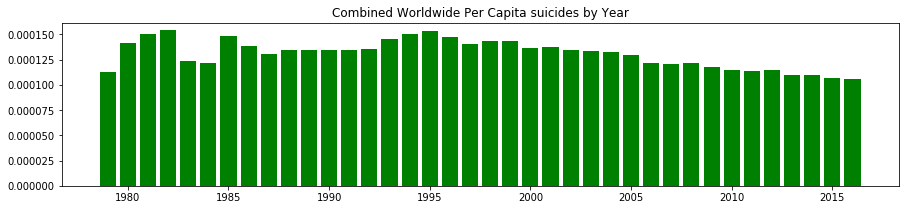

In [13]:
dfYear = df.groupby(['year']).sum()
dfYear = dfYear.reset_index()
print(list(dfYear))
dfYear['perCapita'] = dfYear['suicides_no']/dfYear['population']
plt.figure(figsize = (15,3))
plt.title('Combined Worldwide Per Capita suicides by Year')
plt.bar(dfYear['year'], dfYear['perCapita'], color = "green")

Once the year data is taken with the summed numbers, we are left with only the total number of suicides and the total population for the period. We then calculate the new per Capita suicides and plot the results by year. We can see that the plot is much more even looking with less extreme spikes and dips. The highest values are for 1982, 1995, 1981 and 1994. The lowest values are for 2016, 2015, 2014 and 2013.

<BarContainer object of 2 artists>

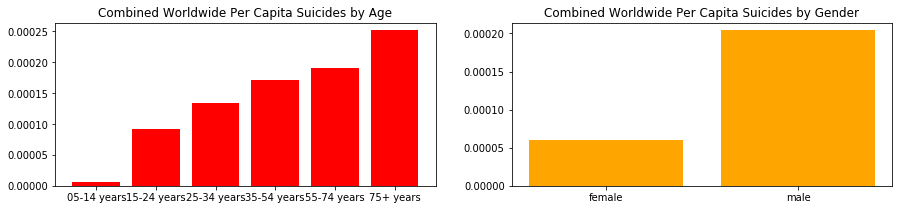

In [8]:
dfAge = df.groupby(['age']).sum()
dfAge = dfAge.reset_index()
dfAge['perCapita'] = dfAge['suicides_no']/dfAge['population']

dfSex = df.groupby(['sex']).sum()
dfSex = dfSex.reset_index()
dfSex['perCapita'] = dfSex['suicides_no']/dfSex['population']

plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.title("Combined Worldwide Per Capita Suicides by Age")
plt.bar(dfAge['age'], dfAge['perCapita'], color = "red")
plt.subplot(1,2,2)
plt.title("Combined Worldwide Per Capita Suicides by Gender")
plt.bar(dfSex['sex'], dfSex['perCapita'], color = "orange")

Although the highest group is still 75 + years the second highest group is now 55 - 74 years. The data trends that the older the person is the more likely they are to commit suicide. Males are still far more likely to commit suicide than females.

['country', 'year', 'suicides_no', 'population', 'perCapita']


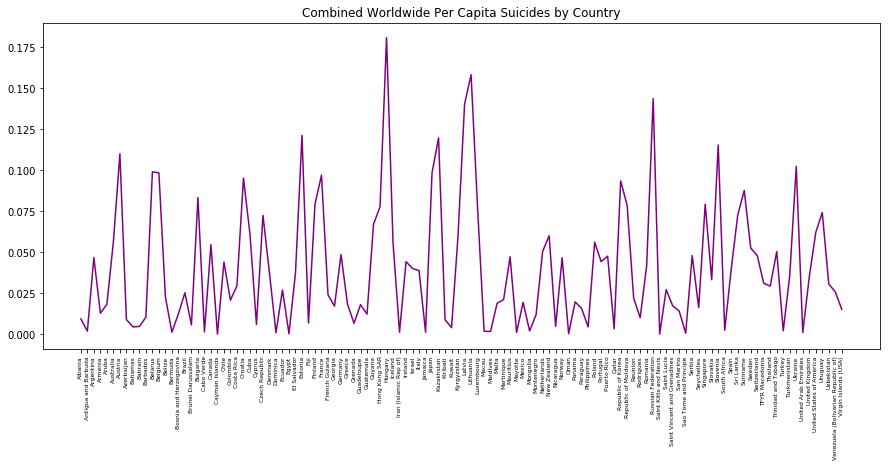

In [9]:
dfCountry = df.groupby(['country']).sum()

dfCountry = dfCountry.reset_index()
print(list(dfCountry))

plt.figure(figsize = (15,6))
plt.xticks(fontsize = 6, rotation = 90)
plt.title("Combined Worldwide Per Capita Suicides by Country")
plt.plot(dfCountry['country'], dfCountry['perCapita'], color = "purple")

After we group the values in the data by their country and then add all the values, we now have only the columns year, suicide number, population and per capita. We then recalculate the per capita suicide numbers from the sum of the overall suicides and population. The new plot looks very different from the plot by country with the raw data. We find that the countries with the highest per capita rates over the entire 38-year period regardless of age or gender are now Lithuania, Hungary, the Russian Federation and Sri Lanka. The lowest are Cayman Islands, Saint Kitts and Nevis, Egypt and Oman.

## Per Capita in More Detail Summary

Since the trends with age and gender are so clear, further investigation seems unlikely to yield any different results. The data does very greatly for country and year without a clear trend except for a current downward trend from 2013-2016 and generally from 2000-2016. What will the data show when we visualize just the highest four countries for per capita suicides by year?

## Country and Year Examination

c:\users\nstow\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 38 artists>

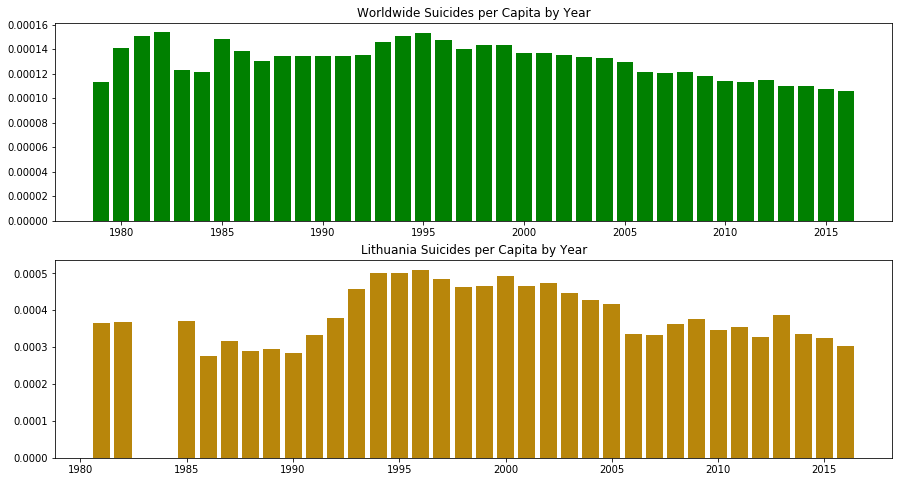

In [23]:
y = 1979
pc = 0

listYear = list()
listPerCapita = list()
comboDict = {}

while y < 2017:
    dfLithuania = df.loc[(df['country'] == 'Lithuania') & (df['year'] == y)]
    pc = dfLithuania['suicides_no'].sum()/dfLithuania['population'].sum()
    listYear.append(y)
    listPerCapita.append(pc)
    comboDict = {'year': listYear,'perCapita':listPerCapita}
    dfYearPerCapita  = pd.DataFrame(comboDict)
    y = y + 1   
   
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
plt.bar(dfYear['year'], dfYear['perCapita'], color = "green")
plt.subplot(2,1,2)
plt.title('Lithuania Suicides per Capita by Year')
plt.bar(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")



We recall that the highest years for suicide across all countries were 1982, 1995, 1991 and 1991. This plot shows that there is some correlation between the country with the highest suicide rates, Lithuania, and worldwide suicide rates. Lithuania had the most suicides in 1996 which isn't on the top worldwide years, but Lithuania does have high rates for 1995 and 1994. 

While there was a spike in the suicide rates through the 1990s, we do see a general downward trend after 2000 with a few spikes.

<BarContainer object of 38 artists>

<Figure size 1080x288 with 0 Axes>

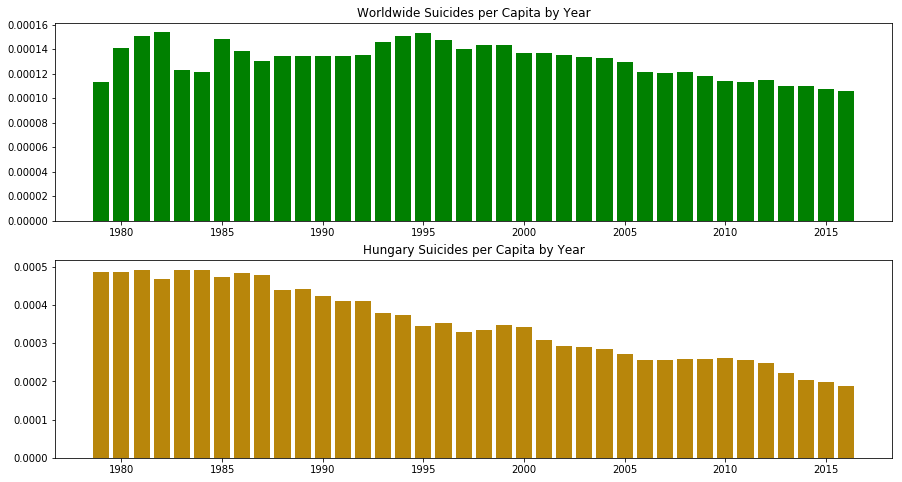

In [20]:
y = 1979
pc = 0

listYear = list()
listPerCapita = list()
comboDict = {}

while y < 2017:
    dfHungary = df.loc[(df['country'] == 'Hungary') & (df['year'] == y)]
    pc = dfHungary['suicides_no'].sum()/dfHungary['population'].sum()
    listYear.append(y)
    listPerCapita.append(pc)
    comboDict = {'year': listYear,'perCapita':listPerCapita}
    dfYearPerCapita  = pd.DataFrame(comboDict)
    y = y + 1   

plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
plt.bar(dfYear['year'], dfYear['perCapita'], color = "green")
plt.subplot(2,1,2)
plt.title('Hungary Suicides per Capita by Year')
plt.bar(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

The suicides per capita data for Hungary does not mirror the worldwide data except for high values in the 1980s. Overall, there is a fairly dramatic downward trend in suicides per capita for Hungary.

c:\users\nstow\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 38 artists>

<Figure size 1080x288 with 0 Axes>

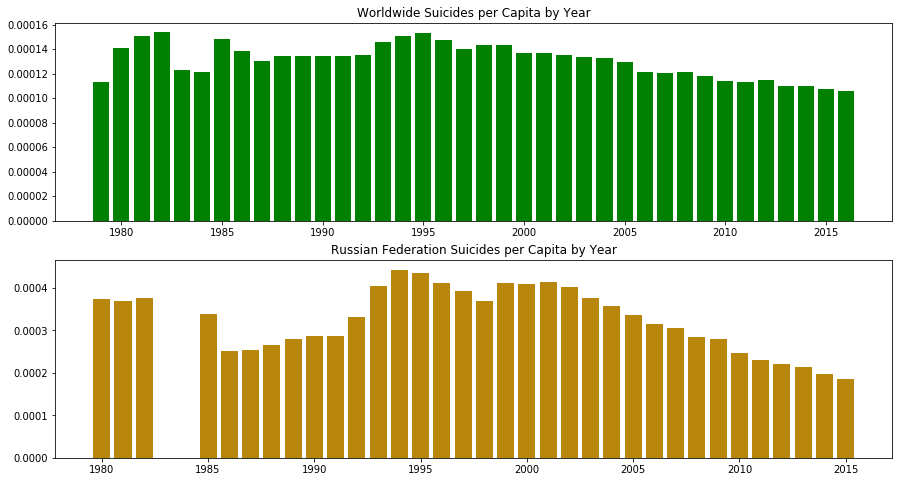

In [19]:
y = 1979
pc = 0

listYear = list()
listPerCapita = list()
comboDict = {}

while y < 2017:
    dfRussia= df.loc[(df['country'] == 'Russian Federation') & (df['year'] == y)]
    pc = dfRussia['suicides_no'].sum()/dfRussia['population'].sum()
    listYear.append(y)
    listPerCapita.append(pc)
    comboDict = {'year': listYear,'perCapita':listPerCapita}
    dfYearPerCapita  = pd.DataFrame(comboDict)
    y = y + 1   

plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
plt.bar(dfYear['year'], dfYear['perCapita'], color = "green")
plt.subplot(2,1,2)
plt.title('Russian Federation Suicides per Capita by Year')
plt.bar(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

We can see that the data for the Russian Federation spikes in 1994 and 1995 like the worldwide data and takes a downward trend, similar to the worldwide data, but more dramatically.

c:\users\nstow\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 38 artists>

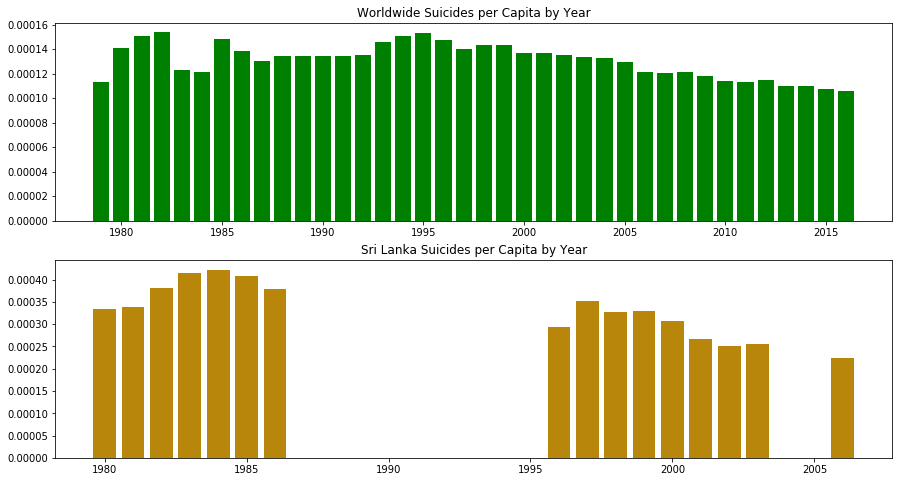

In [22]:
y = 1979
pc = 0

listYear = list()
listPerCapita = list()
comboDict = {}

while y < 2017:
    dfSriLanka = df.loc[(df['country'] == 'Sri Lanka') & (df['year'] == y)]
    pc = dfSriLanka['suicides_no'].sum()/dfSriLanka['population'].sum()
    listYear.append(y)
    listPerCapita.append(pc)
    comboDict = {'year': listYear,'perCapita':listPerCapita}
    dfYearPerCapita  = pd.DataFrame(comboDict)
    y = y + 1   

plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
plt.title('Worldwide Suicides per Capita by Year')
plt.bar(dfYear['year'], dfYear['perCapita'], color = "green")
plt.subplot(2,1,2)
plt.title('Sri Lanka Suicides per Capita by Year')
plt.bar(dfYearPerCapita['year'], dfYearPerCapita['perCapita'], color = "darkgoldenrod")

It is difficult to accurately compare Sri Lanka to the worldwide data as there are so many missing years. This makes us wonder what would happen to the worldwide date if the missing years were included and if the data would be similar between Sri Lanka and the world. With the data we have, there is an overall downward trend for suicides per Capita for Sri Lanka.

## Country and Year Examination Summary

We can see from the comparrison of the data from the four countries with the highest per capita suicides by year and the worldwide data that it is possible that the overall downward trend in worldwide suicides per capita is likely related to the same downward trends in Lithuania, Hungary, the Russian Federation and Sri Lanks

## Futher Examination of the Data

There are many other questions that could be asked of this data. A few of them are:

-  Do certain countries have higher rates of suicide in men or women?
-  Does gender influence the rate of suicide for a given age group?
-  Could any of the spikes in suicides in certain countries be related to economic or political conditions?
-  What conditions could possibly be causing the downward trend in worldwide suicides?

The last two explorations would require insite into the conditions locally and worldwide
